In [2]:
import pysal
import libpysal
import math
import pandas as pd
import numpy as np
import geopandas as gpd 
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt
from esda.moran import Moran
np.random.seed(10)
sf = gpd.read_file('./data_for_paper_final_version/Grids with hash rate and energy(201806-201905)/Grids with hash rate and energy(201806-201905).shp')
w = libpysal.io.open('./data_for_paper_final_version/Spatial weight matrix excluding diagonal.gal').read()

In [2]:
mi = Moran(sf['HrateZS'],  w, transformation='r', permutations=999, two_tailed=True)

In [3]:
print("Univariate Moran Hashrate :", mi.I, mi.p_sim, mi.z_sim, mi.EI_sim, mi.VI_sim,mi.seI_sim)

Univariate Moran Hashrate : 0.6494899203939182 0.001 97.8245938879573 9.966861577748252e-05 4.4067196561501725e-05 0.006638312779728124


In [ ]:
'''
source code for esda.Moran
https://pysal.org/esda/_modules/esda/moran.html#Moran
class Moran(object):
    def __init__(
            self, y, w, transformation="r", permutations=PERMUTATIONS, two_tailed=True):
        y = np.asarray(y).flatten()
        self.y = y
        w.transform = transformation
        self.w = w
        self.permutations = permutations
        self.__moments()
        self.I = self.__calc(self.z)
        self.z_norm = (self.I - self.EI) / self.seI_norm
        self.z_rand = (self.I - self.EI) / self.seI_rand

        if self.z_norm > 0:
            self.p_norm = 1 - stats.norm.cdf(self.z_norm)
            self.p_rand = 1 - stats.norm.cdf(self.z_rand)
        else:
            self.p_norm = stats.norm.cdf(self.z_norm)
            self.p_rand = stats.norm.cdf(self.z_rand)

        if two_tailed:
            self.p_norm *= 2.0
            self.p_rand *= 2.0

        if permutations:
            sim = [
                self.__calc(np.random.permutation(self.z)) for i in range(permutations)
            ]
            self.sim = sim = np.array(sim)
            above = sim >= self.I
            larger = above.sum()
            if (self.permutations - larger) < larger:
                larger = self.permutations - larger
            self.p_sim = (larger + 1.0) / (permutations + 1.0)
            self.EI_sim = sim.sum() / permutations
            self.seI_sim = np.array(sim).std()
            self.VI_sim = self.seI_sim ** 2
            self.z_sim = (self.I - self.EI_sim) / self.seI_sim
            if self.z_sim > 0:
                self.p_z_sim = 1 - stats.norm.cdf(self.z_sim)
            else:
                self.p_z_sim = stats.norm.cdf(self.z_sim)

        # provide .z attribute that is znormalized
        sy = y.std()
        self.z /= sy


    def __moments(self):
        self.n = len(self.y)
        y = self.y
        z = y - y.mean()
        self.z = z
        self.z2ss = (z * z).sum()
        self.EI = -1.0 / (self.n - 1)
        n = self.n
        n2 = n * n
        s1 = self.w.s1
        s0 = self.w.s0
        s2 = self.w.s2
        s02 = s0 * s0
        v_num = n2 * s1 - n * s2 + 3 * s02
        v_den = (n - 1) * (n + 1) * s02
        self.VI_norm = v_num / v_den - (1.0 / (n - 1)) ** 2
        self.seI_norm = self.VI_norm ** (1 / 2.0)

        # variance under randomization
        xd4 = z ** 4
        xd2 = z ** 2
        k_num = xd4.sum() / n
        k_den = (xd2.sum() / n) ** 2
        k = k_num / k_den
        EI = self.EI
        A = n * ((n2 - 3 * n + 3) * s1 - n * s2 + 3 * s02)
        B = k * ((n2 - n) * s1 - 2 * n * s2 + 6 * s02)
        VIR = (A - B) / ((n - 1) * (n - 2) * (n - 3) * s02) - EI * EI
        self.VI_rand = VIR
        self.seI_rand = VIR ** (1 / 2.0)

    def __calc(self, z):
        zl = slag(self.w, z)
        inum = (z * zl).sum()
        return self.n / self.w.s0 * inum / self.z2ss

    @property
    def _statistic(self):
        """More consistent hidden attribute to access ESDA statistics"""
        return self.I

    @classmethod
    def by_col(
        cls, df, cols, w=None, inplace=False, pvalue="sim", outvals=None, **stat_kws
    ):
        """
        Function to compute a Moran statistic on a dataframe

        Arguments
        ---------
        df          :   pandas.DataFrame
                        a pandas dataframe with a geometry column
        cols        :   string or list of string
                        name or list of names of columns to use to compute the statistic
        w           :   pysal weights object
                        a weights object aligned with the dataframe. If not provided, this
                        is searched for in the dataframe's metadata
        inplace     :   bool
                        a boolean denoting whether to operate on the dataframe inplace or to
                        return a series contaning the results of the computation. If
                        operating inplace, the derived columns will be named
                        'column_moran'
        pvalue      :   string
                        a string denoting which pvalue should be returned. Refer to the
                        the Moran statistic's documentation for available p-values
        outvals     :   list of strings
                        list of arbitrary attributes to return as columns from the
                        Moran statistic
        **stat_kws  :   keyword arguments
                        options to pass to the underlying statistic. For this, see the
                        documentation for the Moran statistic.

        Returns
        --------
        If inplace, None, and operation is conducted on dataframe in memory. Otherwise,
        returns a copy of the dataframe with the relevant columns attached.

        """
        return _univariate_handler(
            df,
            cols,
            w=w,
            inplace=inplace,
            pvalue=pvalue,
            outvals=outvals,
            stat=cls,
            swapname=cls.__name__.lower(),
            **stat_kws
        )

'''

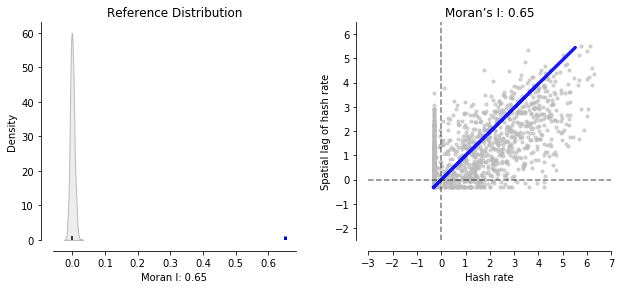

In [4]:
from splot.esda import plot_moran
import matplotlib.pyplot as plt
fig, ax = plot_moran(mi, figsize=(10,4),  scatter_kwds=dict(marker = 'o', s=10), fitline_kwds=dict(color='b', linewidth=3))
ticks = np.arange(-3, 8, 1)
plt.xticks(ticks)
plt.yticks(ticks)
ax[1].set_title('Moran’s I: '+str(round(mi.I, 2)))
ax[1].set_xlabel('Hash rate')
ax[1].set_ylabel('Spatial lag of hash rate')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)